
## Lesson 14.1 - Plotting with Seaborn: Controlling figure aesthetics

*Facsimile of [Seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).*

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it's nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it's even more necessary to have figures that catch the attention and draw a viewer in.

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
np.random.seed(sum(map(ord, "aesthetics")))

Let's define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

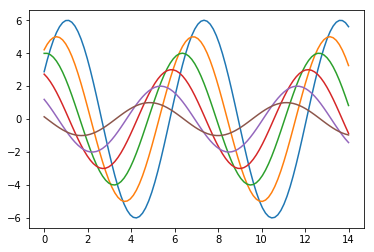

In [5]:
sinplot()

To switch to seaborn defaults, simply import the package using `import seaborn as sns` and type `sns.set`.

Install `seaborn` if you don't have it already: from inside your desired conda environment, run the command `conda install seaborn`.

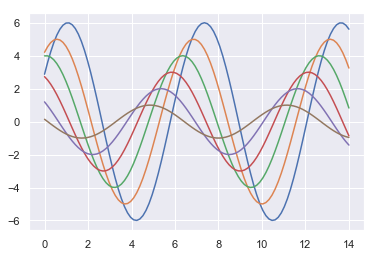

In [6]:
import seaborn as sns

# switch to seaborn defaults
sns.set()
sinplot()

The seaborn defaults break from the MATLAB-inspired aesthetic of matplotlib to plot in more muted colors over a light gray background with white grid lines. We find that the grid aids in the use of figures for conveying quantitative information; in almost all cases, figures should be preferred to tables. The white-on-gray grid that is used by default avoids being obtrusive. The grid is particularly useful in giving structure to figures with multiple facets, which is central to some of the more complex tools in the library.

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the `axes_style` and `set_style` functions. To scale the plot, use the `plotting_context` and `set_context` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.


### Styling figures with `axes_style` and `set_style`

There are five preset seaborn themes: ``darkgrid``, ``whitegrid``, ``dark``, ``white``, and ``ticks``. They are each suited to different applications and personal preferences. The default theme is ``darkgrid``. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The ``whitegrid`` theme is similar, but it is better suited to plots with heavy data elements:

In [7]:
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
data

array([[ 0.80599761, -1.01998744, -0.20984338,  1.5339199 ,  2.13851177,
         0.55455318],
       [-0.93344575,  1.31508022,  2.52033987, -0.34569727,  1.88924472,
         3.06909213],
       [-0.34138991, -0.00521104,  0.83826965,  0.74431758,  0.6953153 ,
         2.29606686],
       [ 1.13731585,  0.29993136,  1.98293321,  0.43116569,  1.89488735,
         1.5665543 ],
       [ 0.37892569,  0.32892184,  0.49832548, -0.10304403,  2.06510083,
         2.69116086],
       [-0.66920923, -0.58088412,  0.59611132,  3.30575676,  3.20531154,
         2.40979019],
       [ 0.52448246,  0.79002931,  0.33452638,  0.25767919,  1.44914163,
         1.25721224],
       [-0.10996288,  0.67140701,  0.65084974,  1.79305109,  2.79651242,
         1.18214425],
       [ 2.35663418, -0.81431246, -0.55036182,  0.78515772,  3.89248445,
         2.13327079],
       [ 1.67811696,  0.54806375,  1.78530229,  2.05304121,  1.22106051,
         3.50759657],
       [-0.47731063, -1.33317443,  0.75998427,  1.

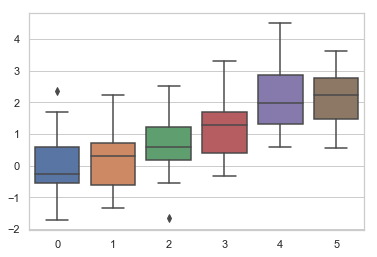

In [8]:
sns.set_style("whitegrid")
sns.boxplot(data=data)

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

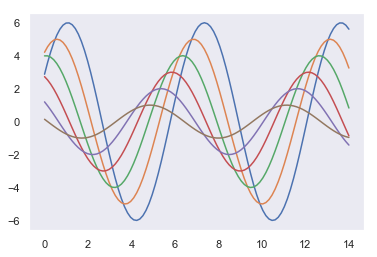

In [9]:
sns.set_style("dark")
sinplot()

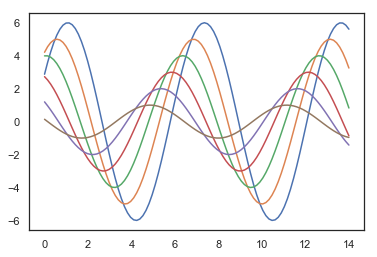

In [10]:
sns.set_style("white")
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

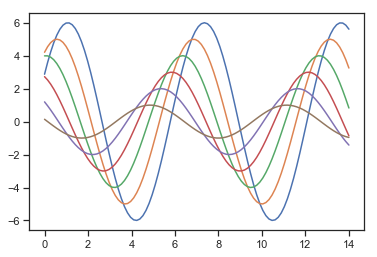

In [11]:
sns.set_style("ticks")
sinplot()

### Removing spines with `despine`

Both the ``white`` and ``ticks`` styles can benefit from removing the top and right axes spines, which are not needed. It's impossible to do this through the matplotlib parameters, but you can call the seaborn function `despine` to remove them:

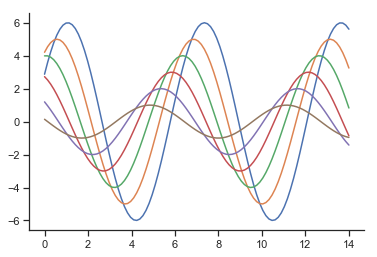

In [12]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine`. When the ticks don't cover the whole range of the axis, the ``trim`` parameter will limit the range of the surviving spines.

/Users/luke.thompson/miniconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


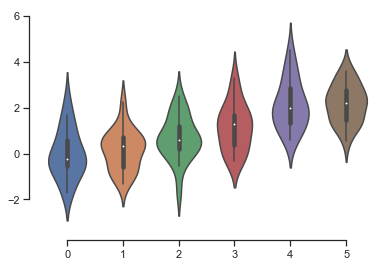

In [13]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True)

You can also control which spines are removed with additional arguments to `despine`:

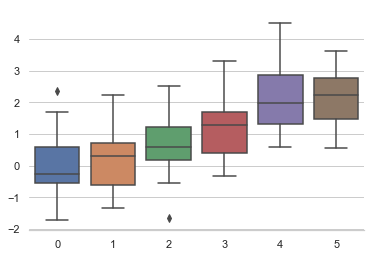

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=data)
sns.despine(left=True)

### Temporarily setting figure style

Although it's easy to switch back and forth, you can also use the `axes_style` function in a ``with`` statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

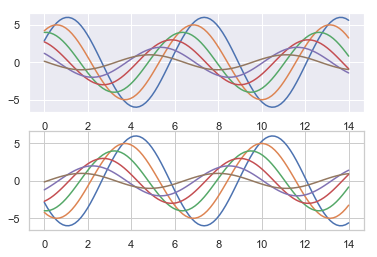

In [15]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

### Overriding elements of the seaborn styles

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the ``rc`` argument of `axes_style` and `set_style`. Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level `set` function takes a dictionary of any matplotlib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [16]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

You can then set different versions of these parameters:

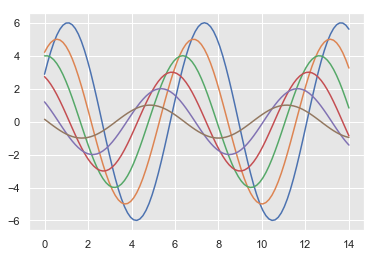

In [17]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

In [18]:
sns.axes_style()

{'axes.facecolor': '.9',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### Scaling plot elements with `plotting_context` and `set_context`

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let's reset the default parameters by calling `set`:

In [19]:
sns.set()

The four preset contexts, in order of relative size, are ``paper``, ``notebook``, ``talk``, and ``poster``. The ``notebook`` style is the default, and was used in the plots above.

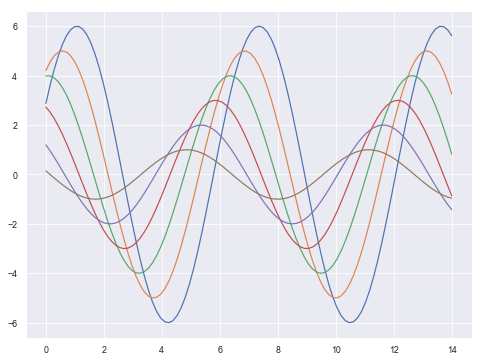

In [20]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

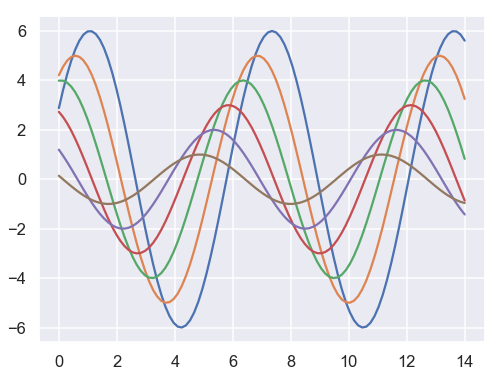

In [21]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

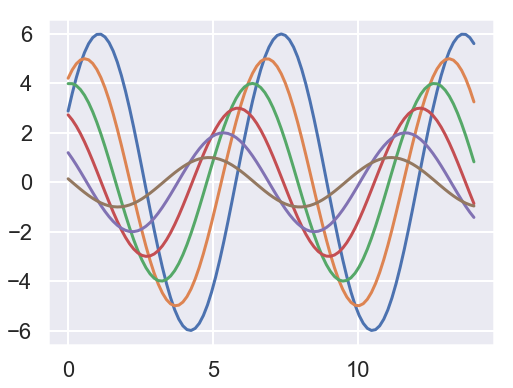

In [22]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call `set_context` with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level `set` function).

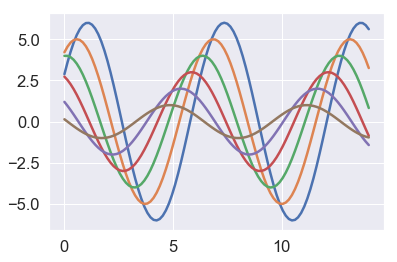

In [23]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

Note: "rc" is old unix jargon meaning commands are automatically **r**un at startup and they **c**onfigure your stuff.

Similarly (although it might be less useful), you can temporarily control the scale of figures nested under a `with` statement.

Both the style and the context can be quickly configured with the `set` function. This function also sets the default color palette, but that will be covered in more detail in the next section of the tutorial.